# California Houses Notebook

## Setup

In [3]:
# to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# common imports
import numpy as np
import os
import pandas as pd
import seaborn as sb

pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Select a PATH pointing to your working directory - where your datasets are saved

In [4]:
PATH = '../machine learning/'

Then use the \<os> module to change your current (default) working directory to PATH, your new working directory

In [5]:
os.chdir(PATH)

**Import the \<California_Houses.csv> dataset from your working directory**

In [6]:
df = pd.read_csv('California_Houses.csv')

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [7]:
df.head(5)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

In [8]:
df.tail(5)

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

Save the transformed dataset as "housing"

In [9]:
rename_dict = {'Distance_to_LA':'LA',
               'Distance_to_SanDiego': 'SanDiego',
              'Distance_to_SanJose': 'SanJose',
              'Distance_to_SanFrancisco' :'SanFrancisco'}

df.rename(columns=rename_dict, inplace=True)
df['Closest_city'] = df[['LA', 'SanDiego', 'SanJose', 'SanFrancisco']].idxmin(axis=1)
df.drop(['LA', 'SanDiego', 'SanJose', 'SanFrancisco'], axis=1, inplace=True)

In [10]:
housing = df.copy()

In [11]:
housing.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Closest_city  
0  SanFrancisco  
1  SanFrancisco  
2  SanFrancisco  
3  SanFrancisco  
4  SanFrancisco

**Display the summary of your new dataframe**

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
 9   Distance_to_coast   20640 non-null  float64
 10  Closest_city        20640 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


In [133]:
housing.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  
count       20640.000000  
mean        40509.264883  
std         49140.039160  
min           120.676447  
25%          9079.756762  
50%         20522.019101  
75%         49830.414479  
max        333804.686371

# Part 1 - Data explorations

### *``Discrete quantitative variables : Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households.Continuous quantitative variables: Median_House_Value, Median_Income , Tot_Bedrooms, Latitude, Longitude. Only Closest_city is a nominial categorical variable.``*


### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [13]:
housing['Closest_city'].value_counts()

Closest_city
LA              9823
SanFrancisco    5054
SanJose         3764
SanDiego        1999
Name: count, dtype: int64

### Show a summary of the quantitative attributes
**Use tables and plots**

In [14]:
housing.select_dtypes(['int','float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
 9   Distance_to_coast   20640 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
housing

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Closest_city  
0      SanFrancisco  
1      SanFrancisco  
2      SanFrancisco  
3      SanFrancisco  
4      SanFrancisco  
...             ...  
20635  SanFrancisco  
20636  SanFrancisco  
20637  SanFrancisco  
20638  SanFrancisco  
20639  SanFrancisco  

[20640 rows x 11 columns]

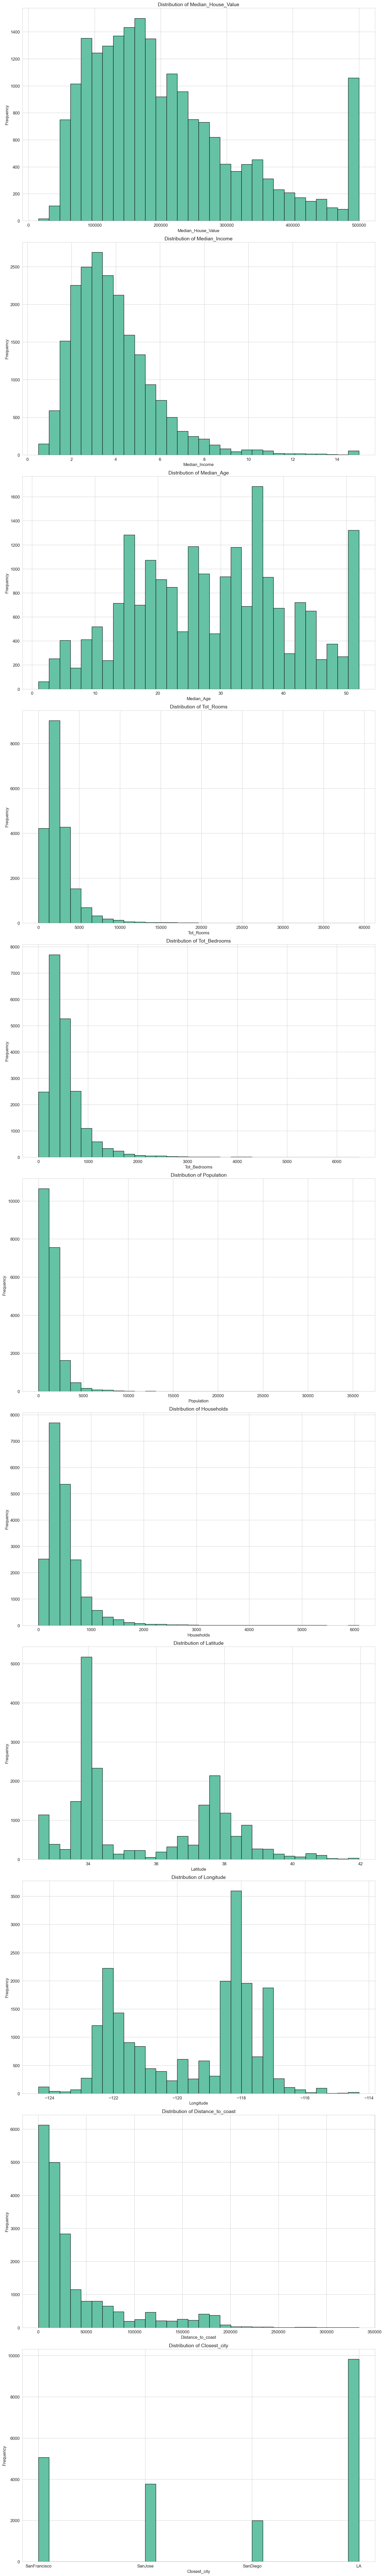

In [17]:
# Use a seaborn style
sb.set_style('whitegrid')

num_cols = len(housing.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(15,100))

# Plot each column
for ax, column in zip(axes, housing.columns):
    housing[column].hist(ax=ax, bins=30, color=sb.color_palette('Set2')[0], edgecolor='black')
    ax.set_title(f"Distribution of {column}", fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

#### Look more carefully into the distribution of the "median_income" column


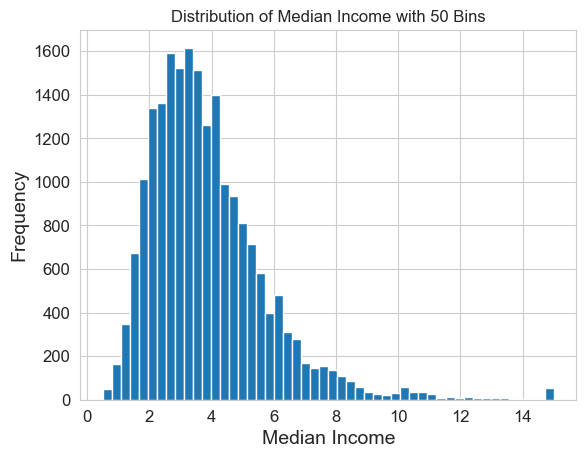

In [18]:
df['Median_Income'].hist(bins=50)
plt.title("Distribution of Median Income with 50 Bins")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

C:\Users\Chadi\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


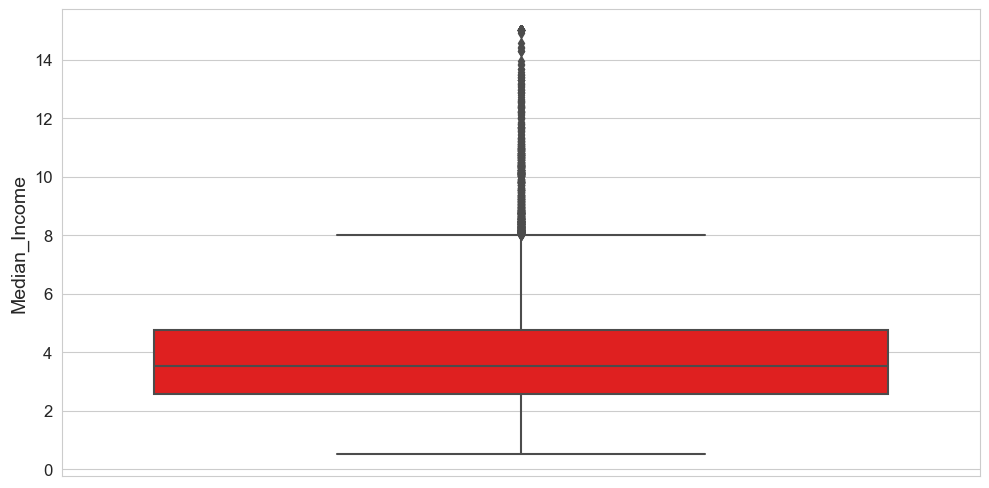

In [19]:
## Your code for a boxplot here ##
plt.figure(figsize=(10,5))
sb.boxplot(y='Median_Income', data=housing, color = 'red')
plt.tight_layout()
plt.show()

### Explain the following lines of code

### *``For the first cell, we get a list with the minimum value of the column Median_Income, the quartiles for 0.2,0.4,0.6 and 0.8. Finally the last element is the maximum value of Median_Income. In the second cell, we use the pd.cut() function to create a new categorical column income_cat which contains 5 percentile ranges of the Median_Income Column  ``*


In [20]:
cat=[np.min(housing["Median_Income"])]
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(housing["Median_Income"].quantile(i))
cat.append(np.max(housing["Median_Income"]))
print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


In [21]:
housing["income_cat"]=pd.cut(housing["Median_Income"], bins=cat, labels = [1,2,3,4,5], include_lowest=True)

In [22]:
# Counting the amount of values we have in eanch percentile range #
housing["income_cat"].value_counts()

income_cat
2    4131
1    4130
4    4128
5    4128
3    4123
Name: count, dtype: int64

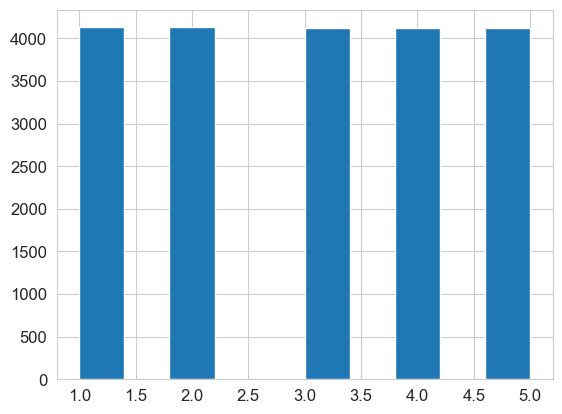

In [23]:
# Plotting Histogram of income_cat variable 
housing["income_cat"].hist();

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_city        20640 non-null  object  
 11  income_cat          20640 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 1.8+ MB


### Create a Test Set through stratified random sampling on the income variable

### *``Why a test set? In order to evaluate the effectiveness of machine learning models, a test set is necessary. In addition to ensuring that a model fits the training data, it also ensures that it generalizes well to new data, preventing overfitting. Additionally, it helps in fine-tuning model setups and enables for the comparison of several models to determine which is the most successful. Additionally, it assures consistent and verifiable outcomes, boosting the reproducibility of research and conclusions, by keeping a test set distinct and untouched during the model-building phase.``*

### *``Why stratify the data on the income variable before generating a test set? Before generating a test set, stratifying data on the income variable makes ensuring that the test set's income distribution is representative of the full dataset. This ensures that the test set is accurately representative and guards against biases brought on by unequal income distributions. Additionally, stratification offers consistent and repeatable train-test splits when used with a fixed seed, allowing accurate comparisons between models and settings.``*

## from sklearn.model_selection import train_test_split

In [26]:
train_strat, test_strat = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

Now generate an equivalent random split without stratification

In [27]:
train_random, test_random = train_test_split(housing, test_size=0.2, random_state=42)

#### Explain precisely what each of the two following cells do.

### *``This code compares how different methods of creating test sets can reproduce the income category distribution of the complete dataset. After defining a function, income_cat_proportions, which calculates the proportion of each income category in a dataset, we divide the housing dataset into a training set and a test set using random sampling. Next, we build a DataFrame, compare_props, to compare the distribution of income categories in the overall dataset, a stratified sample and a random sample. Finally, the code calculates the percentage error for each sampling method compared with the original distribution. This allows us to see if one of the methods is more accurate in reproducing the original distribution of income categories.``*



In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(test_strat),
    "Random": income_cat_proportions(test_random),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.200097    0.200097  0.202762      1.331719  -1.421085e-14
2           0.200145    0.200097  0.203973      1.912370  -2.420721e-02
3           0.199758    0.199612  0.205184      2.716469  -7.276255e-02
4           0.200000    0.200097  0.198886     -0.557171   4.844961e-02
5           0.200000    0.200097  0.189196     -5.402132   4.844961e-02

**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [30]:
houses_df = train_strat.copy()
houses_df

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816          10       7136          1691   
17718            355300.0         7.2707           8       3088           474   
19928             87700.0         3.6895          29       2409           436   
13782            104600.0         1.3993          28       3009           698   
18138            351500.0         5.2108          31       3344           620   
...                   ...            ...         ...        ...           ...   
12704            141400.0         3.0890          18       6955          1882   
9894             156100.0         2.6518          40       1739           318   
19836             65000.0         2.7500          28       2201           429   
18146            292900.0         7.2779          16       1156           198   
4028             457300.0         5.4088          39       1819           291   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405         2959        1507     37.96    -122.06       10235.180749   
17718        1799         456     37.33    -121.77       31247.007622   
19928        1142         440     36.32    -119.32      173659.998787   
13782        1200         626     34.03    -117.05       87439.318166   
18138        1604         572     37.34    -122.00       16588.263207   
...           ...         ...       ...        ...                ...   
12704        2803        1740     38.58    -121.41       58281.418431   
9894          744         312     38.29    -122.30       17440.080774   
19836        1524         412     36.53    -119.40      182487.335025   
18146         455         216     37.35    -122.03       14704.872231   
4028          770         278     34.18    -118.56       16513.647022   

       Closest_city income_cat  
1405   SanFrancisco          4  
17718       SanJose          5  
19928       SanJose          3  
13782            LA          1  
18138       SanJose          5  
...             ...        ...  
12704  SanFrancisco          2  
9894   SanFrancisco          2  
19836       SanJose          2  
18146       SanJose          5  
4028             LA          5  

[16512 rows x 12 columns]

### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

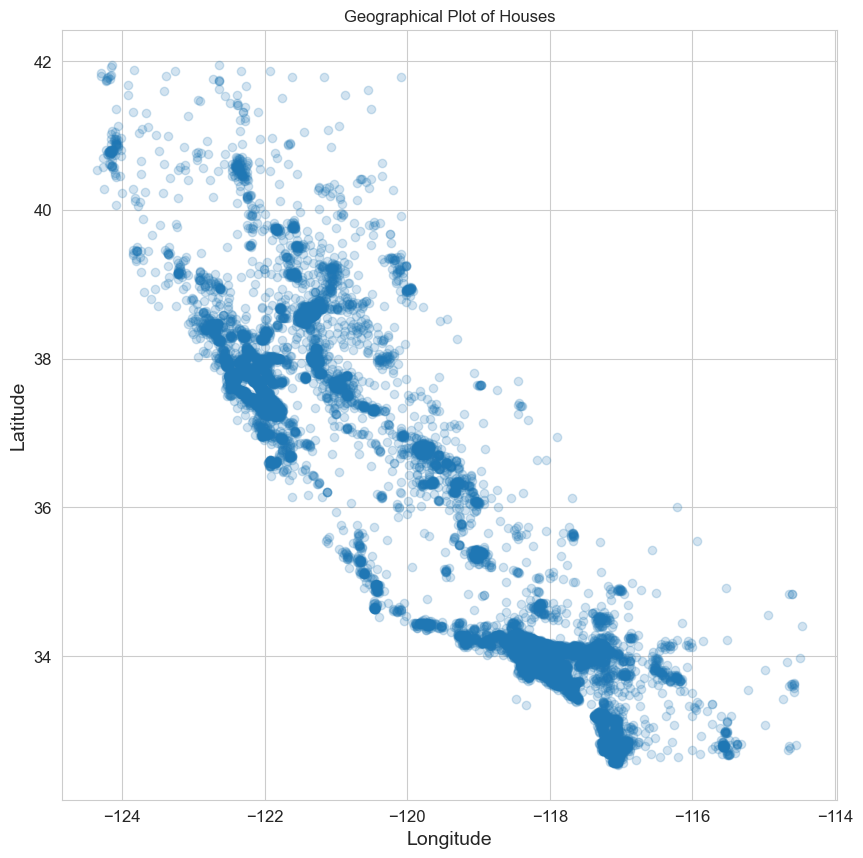

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(houses_df['Longitude'],houses_df['Latitude'],alpha =0.2)
plt.title("Geographical Plot of Houses")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Geographic map of California houses values per district with population density

### *``This code generates a visualization of houses in California using their latitude and longitude coordinates. Initially, it imports the necessary modules and disables warnings. Next, it loads an image of California, which it then overlays with a point cloud representing the houses. The size of each point depends on the population of the house, and the color of the point illustrates the median value of the house. The warmer the color, the higher the value of the house. Finally, a color bar is added to indicate house price ranges, and the visualization is displayed. In summary, this code gives us a beautiful map of homes in California, with information on their location, value and population.``*

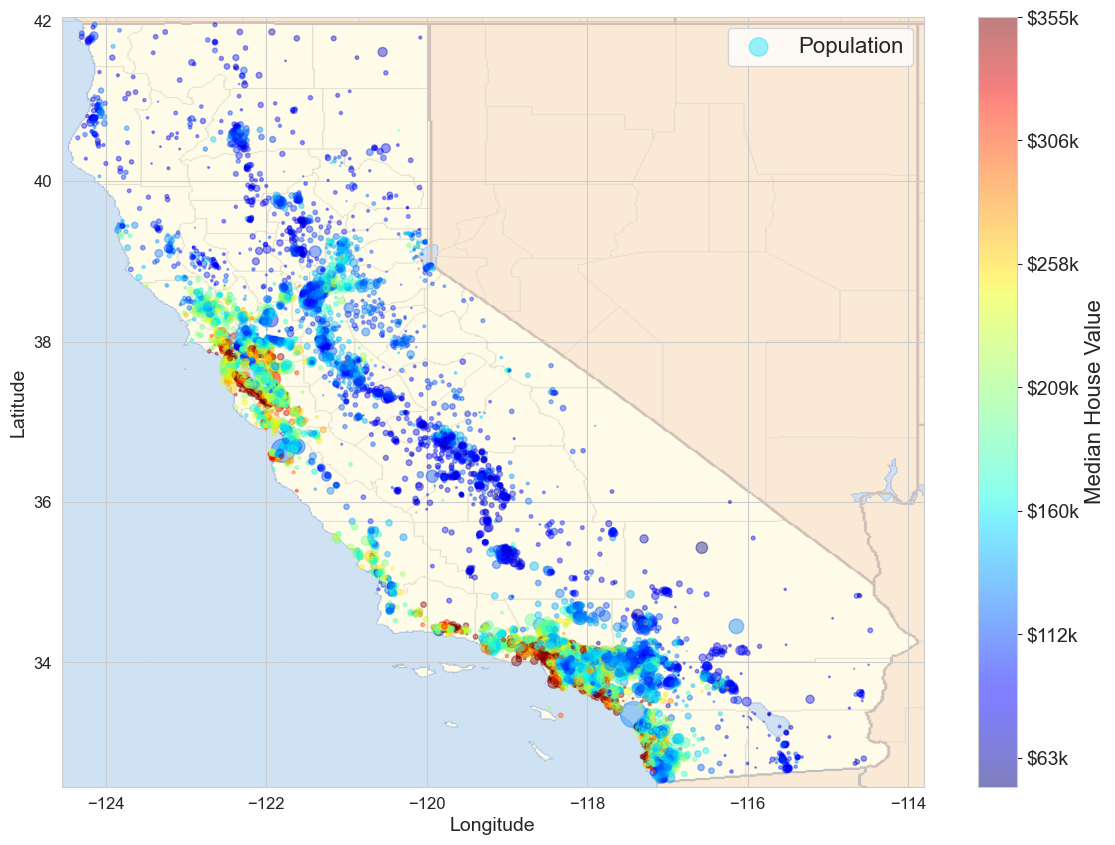

In [32]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = houses_df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(14,10),
                       s=houses_df['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"),colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses_df["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Bivariate Analysis

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

In [33]:
houses_cor = houses_df.select_dtypes(['int','float']).corr()

In [34]:
houses_cor

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  \
Median_House_Value            1.000000       0.689597    0.105611   0.136635   
Median_Income                 0.689597       1.000000   -0.120037   0.202029   
Median_Age                    0.105611      -0.120037    1.000000  -0.359979   
Tot_Rooms                     0.136635       0.202029   -0.359979   1.000000   
Tot_Bedrooms                  0.052198      -0.007776   -0.318223   0.927990   
Population                   -0.023350       0.005136   -0.295396   0.852313   
Households                    0.066550       0.013197   -0.300398   0.916679   
Latitude                     -0.141518      -0.081302    0.013917  -0.033090   
Longitude                    -0.046849      -0.013227   -0.109430   0.040912   
Distance_to_coast            -0.466959      -0.243499   -0.221713  -0.001871   

                    Tot_Bedrooms  Population  Households  Latitude  Longitude  \
Median_House_Value      0.052198   -0.023350    0.066550 -0.141518  -0.046849   
Median_Income          -0.007776    0.005136    0.013197 -0.081302  -0.013227   
Median_Age             -0.318223   -0.295396   -0.300398  0.013917  -0.109430   
Tot_Rooms               0.927990    0.852313    0.916679 -0.033090   0.040912   
Tot_Bedrooms            1.000000    0.875293    0.980579 -0.063797   0.064818   
Population              0.875293    1.000000    0.904064 -0.109085   0.099487   
Households              0.980579    0.904064    1.000000 -0.069316   0.052827   
Latitude               -0.063797   -0.109085   -0.069316  1.000000  -0.925593   
Longitude               0.064818    0.099487    0.052827 -0.925593   1.000000   
Distance_to_coast      -0.023576   -0.041550   -0.063321  0.300766   0.007656   

                    Distance_to_coast  
Median_House_Value          -0.466959  
Median_Income               -0.243499  
Median_Age                  -0.221713  
Tot_Rooms                   -0.001871  
Tot_Bedrooms                -0.023576  
Population                  -0.041550  
Households                  -0.063321  
Latitude                     0.300766  
Longitude                    0.007656  
Distance_to_coast            1.000000

Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

In [35]:
correlation_with_target = houses_cor['Median_House_Value'].sort_values(ascending=False)
correlation_with_target

Median_House_Value    1.000000
Median_Income         0.689597
Tot_Rooms             0.136635
Median_Age            0.105611
Households            0.066550
Tot_Bedrooms          0.052198
Population           -0.023350
Longitude            -0.046849
Latitude             -0.141518
Distance_to_coast    -0.466959
Name: Median_House_Value, dtype: float64

### *``"Median_House_Value" is a relevant output for a linear regression model, as it has significant correlations with certain input variables.``*

**Provide the scatter plots of those predictors with the target**

In [36]:
housing.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Closest_city', 'income_cat'],
      dtype='object')

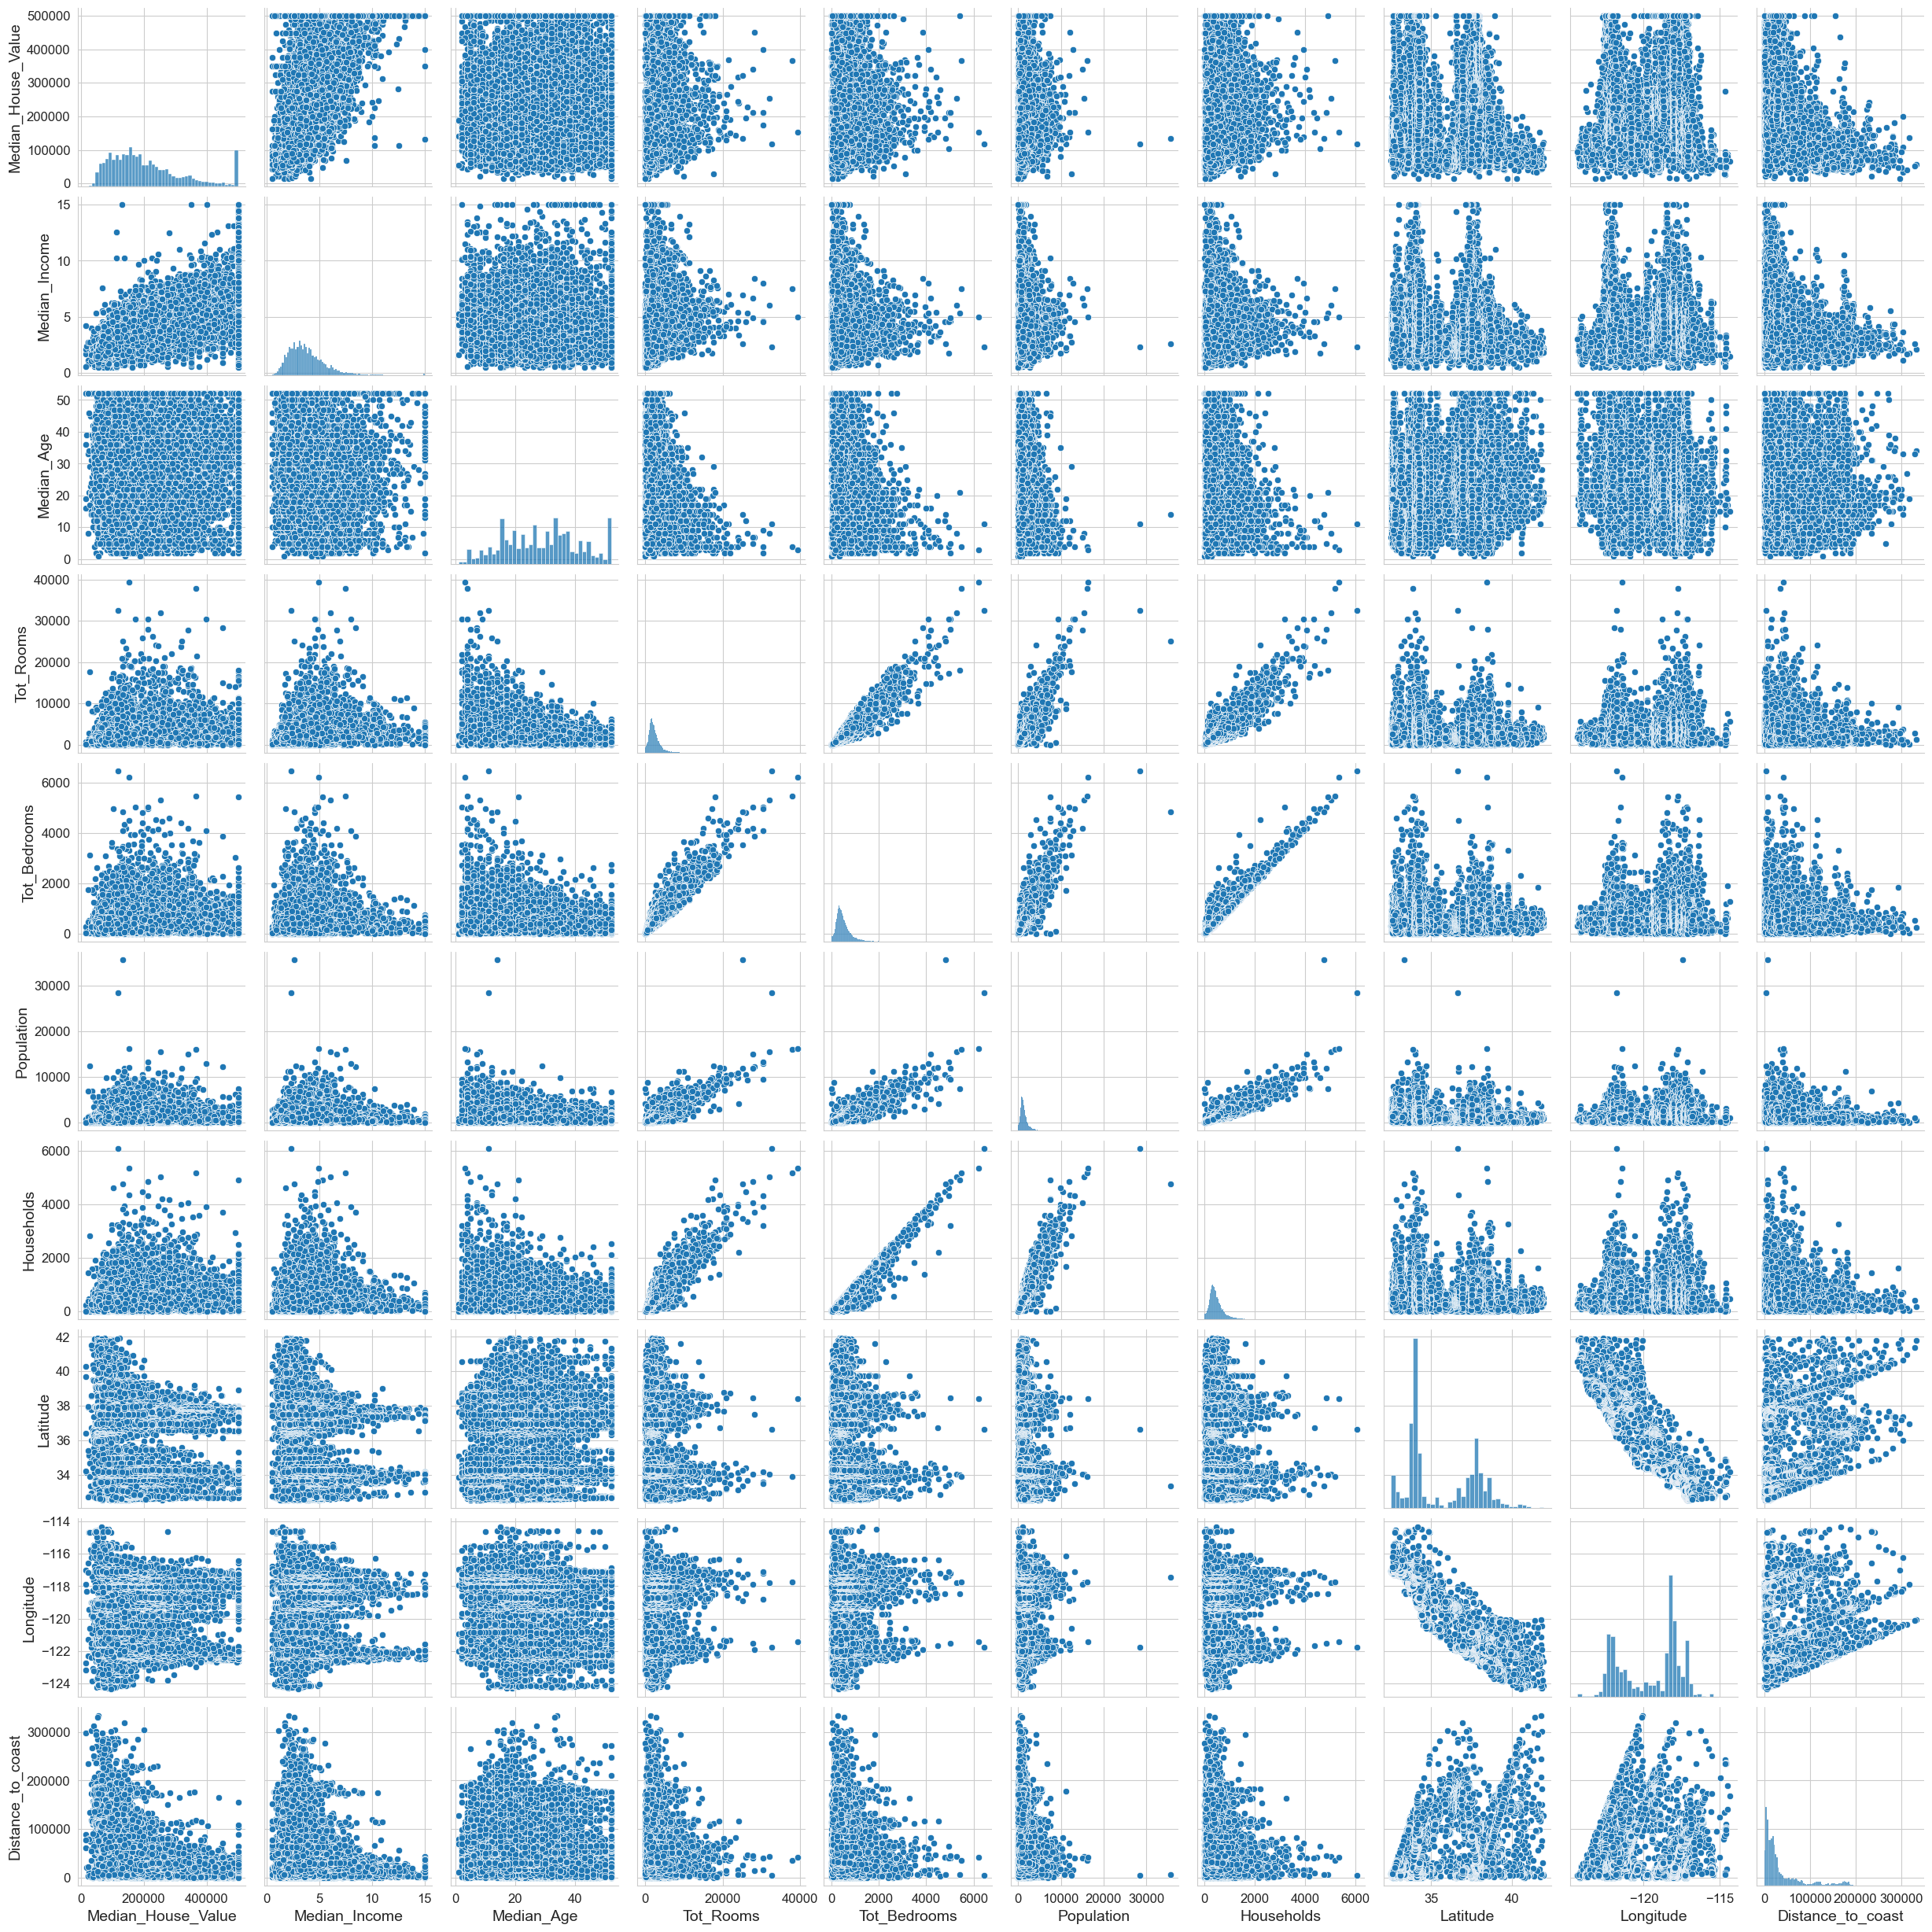

'\nfor predictor in top_predictors.index:\n    plt.figure(figsize=(8, 6))\n    plt.scatter(houses_df[predictor], houses_df[\'Median_House_Value\'], alpha=0.2)\n    plt.title(f"Scatter Plot of {predictor} vs. Median_House_Value")\n    plt.xlabel(predictor)\n    plt.ylabel(\'Median_House_Value\')\n    plt.grid(True)\n    plt.show()\n'

In [37]:
#top_predictors = correlation_with_target[abs(correlation_with_target) > 0.1]

sb.pairplot(housing)
plt.show()

"""
for predictor in top_predictors.index:
    plt.figure(figsize=(8, 6))
    plt.scatter(houses_df[predictor], houses_df['Median_House_Value'], alpha=0.2)
    plt.title(f"Scatter Plot of {predictor} vs. Median_House_Value")
    plt.xlabel(predictor)
    plt.ylabel('Median_House_Value')
    plt.grid(True)
    plt.show()
"""

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [38]:
houses_df["rooms_per_household"] = houses_df["Tot_Rooms"] / houses_df["Households"]
houses_df["bedrooms_per_room"] = houses_df["Tot_Bedrooms"] / houses_df["Tot_Rooms"]
houses_df["people_per_household"] = houses_df["Population"] / houses_df["Households"]

**Let us again look at the correlation between the predictors and the target**

In [39]:
houses_corr = houses_df.select_dtypes(['int','float']).corr()
houses_corr

Median_House_Value  Median_Income  Median_Age  \
Median_House_Value              1.000000       0.689597    0.105611   
Median_Income                   0.689597       1.000000   -0.120037   
Median_Age                      0.105611      -0.120037    1.000000   
Tot_Rooms                       0.136635       0.202029   -0.359979   
Tot_Bedrooms                    0.052198      -0.007776   -0.318223   
Population                     -0.023350       0.005136   -0.295396   
Households                      0.066550       0.013197   -0.300398   
Latitude                       -0.141518      -0.081302    0.013917   
Longitude                      -0.046849      -0.013227   -0.109430   
Distance_to_coast              -0.466959      -0.243499   -0.221713   
rooms_per_household             0.146569       0.308900   -0.148106   
bedrooms_per_room              -0.253952      -0.618810    0.137898   
people_per_household           -0.022265       0.021408    0.012283   

                      Tot_Rooms  Tot_Bedrooms  Population  Households  \
Median_House_Value     0.136635      0.052198   -0.023350    0.066550   
Median_Income          0.202029     -0.007776    0.005136    0.013197   
Median_Age            -0.359979     -0.318223   -0.295396   -0.300398   
Tot_Rooms              1.000000      0.927990    0.852313    0.916679   
Tot_Bedrooms           0.927990      1.000000    0.875293    0.980579   
Population             0.852313      0.875293    1.000000    0.904064   
Households             0.916679      0.980579    0.904064    1.000000   
Latitude              -0.033090     -0.063797   -0.109085   -0.069316   
Longitude              0.040912      0.064818    0.099487    0.052827   
Distance_to_coast     -0.001871     -0.023576   -0.041550   -0.063321   
rooms_per_household    0.124243     -0.004257   -0.075398   -0.083770   
bedrooms_per_room     -0.185977      0.092671    0.042443    0.073986   
people_per_household  -0.024582     -0.028042    0.070129   -0.027147   

                      Latitude  Longitude  Distance_to_coast  \
Median_House_Value   -0.141518  -0.046849          -0.466959   
Median_Income        -0.081302  -0.013227          -0.243499   
Median_Age            0.013917  -0.109430          -0.221713   
Tot_Rooms            -0.033090   0.040912          -0.001871   
Tot_Bedrooms         -0.063797   0.064818          -0.023576   
Population           -0.109085   0.099487          -0.041550   
Households           -0.069316   0.052827          -0.063321   
Latitude              1.000000  -0.925593           0.300766   
Longitude            -0.925593   1.000000           0.007656   
Distance_to_coast     0.300766   0.007656           1.000000   
rooms_per_household   0.105661  -0.026718           0.187837   
bedrooms_per_room    -0.116143   0.094538          -0.081096   
people_per_household  0.003116   0.001459           0.013259   

                      rooms_per_household  bedrooms_per_room  \
Median_House_Value               0.146569          -0.253952   
Median_Income                    0.308900          -0.618810   
Median_Age                      -0.148106           0.137898   
Tot_Rooms                        0.124243          -0.185977   
Tot_Bedrooms                    -0.004257           0.092671   
Population                      -0.075398           0.042443   
Households                      -0.083770           0.073986   
Latitude                         0.105661          -0.116143   
Longitude                       -0.026718           0.094538   
Distance_to_coast                0.187837          -0.081096   
rooms_per_household              1.000000          -0.396517   
bedrooms_per_room               -0.396517           1.000000   
people_per_household            -0.005793           0.003917   

                      people_per_household  
Median_House_Value               -0.022265  
Median_Income                     0.021408  
Median_Age                        0.012283  
Tot_Rooms                     

<Axes: >

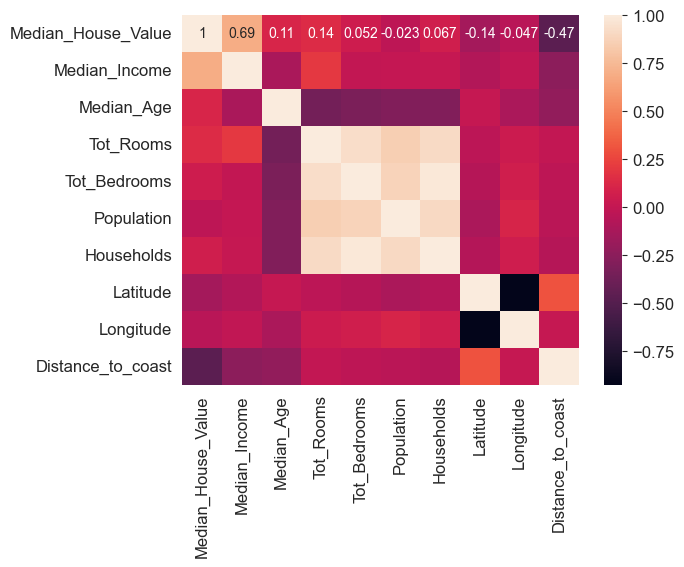

In [40]:
sb.heatmap(houses_cor,annot=True)

# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

In [41]:
# We're randomly selecting 1651 indices from houses_df 

import random
random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [42]:
miss

array([19624, 15938, 17477, ..., 11819, 13609,  5299], dtype=int64)

In [43]:
# We're making a copy to make sure houses_df doesn't get affected by changes 

houses_miss = houses_df.copy()

In [44]:
# for all the rows that were randomly chosen, we're setting all the values to None in the Tot_Bedroom column 

houses_miss.loc[miss,"Tot_Bedrooms"] = None

In [45]:
# Now we can see that Tot_Bedrooms is missing values

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          14950 non-null  float64 
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  object  
 11  income_cat            16512 non-null  category
 12  rooms_per_household   16512 non-null  float64 
 13  bedrooms_per_room     16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtypes: ca

**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [46]:
# We're dropping all the rows associated with missing values by using dropna 

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [47]:
# Now we can see that the rows are gone

houses_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14950 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    14950 non-null  float64 
 1   Median_Income         14950 non-null  float64 
 2   Median_Age            14950 non-null  int64   
 3   Tot_Rooms             14950 non-null  int64   
 4   Tot_Bedrooms          14950 non-null  float64 
 5   Population            14950 non-null  int64   
 6   Households            14950 non-null  int64   
 7   Latitude              14950 non-null  float64 
 8   Longitude             14950 non-null  float64 
 9   Distance_to_coast     14950 non-null  float64 
 10  Closest_city          14950 non-null  object  
 11  income_cat            14950 non-null  category
 12  rooms_per_household   14950 non-null  float64 
 13  bedrooms_per_room     14950 non-null  float64 
 14  people_per_household  14950 non-null  float64 
dtypes: ca

In [48]:
# computing the median of the Tot_Bedrooms column and filling the missing values in the original houses_miss DataFrame with this median value

Bed_med = houses_miss["Tot_Bedrooms"].median()
houses_miss["Tot_Bedrooms"].fillna(Bed_med, inplace=True)

In [49]:
# We can see that the rows are back in Tot_Bedrooms 

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  float64 
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  object  
 11  income_cat            16512 non-null  category
 12  rooms_per_household   16512 non-null  float64 
 13  bedrooms_per_room     16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtypes: ca

### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [50]:
def col_miss (df, col, max_miss):
    '''
    df : a pandas dataframe
    col : the name of the variable column
    max_miss : the maximum number of missing values
    returns a data frame with a random number of missing values on col
    '''
    
    random.seed(42)
    miss = np.random.choice(df.index, max_miss)
    df.loc[miss,col] = None

    return df

In [51]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  int64   
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  object  
 11  income_cat            16512 non-null  category
 12  rooms_per_household   16512 non-null  float64 
 13  bedrooms_per_room     16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtypes: ca

Generate some missing values in the first 10 predictors of \<housing_miss>

In [52]:
first_10_cols = housing_miss.columns[:10]

for col in first_10_cols:
    num_missing = int(0.05 * len(housing_miss))
    housing_miss = col_miss(housing_miss, col, num_missing)

In [53]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    15709 non-null  float64 
 1   Median_Income         15708 non-null  float64 
 2   Median_Age            15721 non-null  float64 
 3   Tot_Rooms             15710 non-null  float64 
 4   Tot_Bedrooms          15704 non-null  float64 
 5   Population            15709 non-null  float64 
 6   Households            15716 non-null  float64 
 7   Latitude              15711 non-null  float64 
 8   Longitude             15715 non-null  float64 
 9   Distance_to_coast     15711 non-null  float64 
 10  Closest_city          16512 non-null  object  
 11  income_cat            16512 non-null  category
 12  rooms_per_household   16512 non-null  float64 
 13  bedrooms_per_room     16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtypes: ca

Now, he have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [54]:
housing_miss.isna().sum()

Median_House_Value      803
Median_Income           804
Median_Age              791
Tot_Rooms               802
Tot_Bedrooms            808
Population              803
Households              796
Latitude                801
Longitude               797
Distance_to_coast       801
Closest_city              0
income_cat                0
rooms_per_household       0
bedrooms_per_room         0
people_per_household      0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [55]:
# Start with simple imputer
from sklearn.impute import SimpleImputer

**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [56]:
imputer = SimpleImputer(strategy='mean')
# Imputing the missing values
X = pd.DataFrame(imputer.fit_transform(housing_miss.select_dtypes(['int','float'])))

# Assigning the right columns and index back to X
selected_columns = housing_miss.select_dtypes(['int','float']).columns
X.columns = selected_columns
X.index = housing_miss.index

**Using KNNImputer, impute missing data in each variable**

In [57]:
from sklearn.impute import KNNImputer

# Create an imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the data
housing_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(housing_miss.select_dtypes(['int','float'])))

# Assigning the right columns and index back
selected_columns = housing_miss.select_dtypes(['int','float']).columns
housing_knn_imputed.columns = selected_columns
housing_knn_imputed.index = housing_miss.index
housing_miss[selected_columns] = housing_knn_imputed


In [58]:
housing_miss

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816        10.0     7136.0        1691.0   
17718            355300.0         7.2707         8.0     2008.2         474.0   
19928             87700.0         3.6895        29.0     2409.0         436.0   
13782            104600.0         1.3993        28.0     3009.0         698.0   
18138            351500.0         5.2108        31.0     3344.0         620.0   
...                   ...            ...         ...        ...           ...   
12704            141400.0         3.0890        18.0     6955.0        1882.0   
9894             156100.0         2.6518        34.2     1739.0         318.0   
19836             65000.0         2.7500        28.0     2201.0         429.0   
18146            292900.0         7.2779        16.0     1156.0         198.0   
4028             457300.0         5.4088        39.0     1819.0         291.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405       2959.0      1507.0     37.96   -122.060       10235.180749   
17718      1799.0       456.0     37.33   -121.770       31247.007622   
19928      1142.0       389.0     36.32   -119.320      173659.998787   
13782      1200.0       626.0     34.03   -117.050       87439.318166   
18138      1604.0       572.0     37.34   -122.000       16588.263207   
...           ...         ...       ...        ...                ...   
12704      2803.0      1740.0     38.58   -121.410       58281.418431   
9894        744.0       312.0     38.29   -119.504       17440.080774   
19836      1524.0       412.0     36.53   -119.400      182487.335025   
18146       455.0       216.0     37.35   -122.030       14704.872231   
4028        770.0       278.0     34.18   -118.560       16513.647022   

       Closest_city income_cat  rooms_per_household  bedrooms_per_room  \
1405   SanFrancisco          4             4.735236           0.236967   
17718       SanJose          5             6.771930           0.153497   
19928       SanJose          3             5.475000           0.180988   
13782            LA          1             4.806709           0.231971   
18138       SanJose          5             5.846154           0.185407   
...             ...        ...                  ...                ...   
12704  SanFrancisco          2             3.997126           0.270597   
9894   SanFrancisco          2             5.573718           0.182864   
19836       SanJose          2             5.342233           0.194911   
18146       SanJose          5             5.351852           0.171280   
4028             LA          5             6.543165           0.159978   

       people_per_household  
1405               1.963504  
17718              3.945175  
19928              2.595455  
13782              1.916933  
18138              2.804196  
...                     ...  
12704              1.610920  
9894               2.384615  
19836              3.699029  
18146              2.106481  
4028               2.769784  

[16512 rows x 15 columns]

In [59]:
housing_miss.isna().sum()

Median_House_Value      0
Median_Income           0
Median_Age              0
Tot_Rooms               0
Tot_Bedrooms            0
Population              0
Households              0
Latitude                0
Longitude               0
Distance_to_coast       0
Closest_city            0
income_cat              0
rooms_per_household     0
bedrooms_per_room       0
people_per_household    0
dtype: int64

### Which imputer is better : SimpleImputer or KNNImputer ?

### *``SimpleImputer fills in missing values using a basic dataset statistic, such as mean, median or mode. It's fast, easy to understand, and works well when missing data are random or when their absence is not related to other variables. KNNImputer, on the other hand, uses the k-nearest neighbor algorithm to replace missing values. It takes into account relationships between features to estimate the best value for a missing input. This is often more accurate than SimpleImputer, especially if the data have complex relationships or non-random missing value patterns. However, it is generally slower and requires more computational resources. To truly know which is better, we could test out the performance on different models seperately and compare them.``*

## 2.2 - Categorical variables...

In [61]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Median_House_Value    16512 non-null  float64 
 1   Median_Income         16512 non-null  float64 
 2   Median_Age            16512 non-null  int64   
 3   Tot_Rooms             16512 non-null  int64   
 4   Tot_Bedrooms          16512 non-null  int64   
 5   Population            16512 non-null  int64   
 6   Households            16512 non-null  int64   
 7   Latitude              16512 non-null  float64 
 8   Longitude             16512 non-null  float64 
 9   Distance_to_coast     16512 non-null  float64 
 10  Closest_city          16512 non-null  object  
 11  income_cat            16512 non-null  category
 12  rooms_per_household   16512 non-null  float64 
 13  bedrooms_per_room     16512 non-null  float64 
 14  people_per_household  16512 non-null  float64 
dtypes: ca

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

### *``Nominal variables are like labels with no specific order, while ordinal variables are labels that have a clear hierarchy or sequence. In our case, Closest_city is nominal because San Francisco isn't "greater" or "less" than Los Angeles – they're just different names. Income_cat is ordinal because we have categories like "low income", "medium income", and "high income", there's a clear order from low to high.``*

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, both categorical variables should be considered nominal**

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [62]:
# Let us select our categorical variables
houses_cat = houses_df[["Closest_city","income_cat"]]

In [63]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE
onehot = OHE(sparse=False)
houses_onehot = onehot.fit_transform(houses_cat)

In [64]:
houses_onehot

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [65]:
onehot.categories_

[array(['LA', 'SanDiego', 'SanFrancisco', 'SanJose'], dtype=object),
 array([1, 2, 3, 4, 5], dtype=int64)]

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [66]:
# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 2.0+ MB


Let us start with a custom transformer to be used to add attributes

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [68]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
houses_plus = attr_adder.transform(housing_df.values)

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

### *``This code creates a tool that can add new information to a house dataset. It calculates how many rooms there are per household and how many people live per household. If desired, it can also calculate how many bedrooms there are per room. Once this new information has been calculated, it is added to the original data set. It's as if you had a list of houses and wanted to add further details for each house based on the information already present.``*

In [69]:
houses_plus_df = pd.DataFrame(houses_plus,
                              columns=list(housing_df.columns)+["rooms_per_household", "population_per_household"],
                              index=housing_df.index)

houses_plus_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Median_House_Value        16512 non-null  object
 1   Median_Income             16512 non-null  object
 2   Median_Age                16512 non-null  object
 3   Tot_Rooms                 16512 non-null  object
 4   Tot_Bedrooms              16512 non-null  object
 5   Population                16512 non-null  object
 6   Households                16512 non-null  object
 7   Latitude                  16512 non-null  object
 8   Longitude                 16512 non-null  object
 9   Distance_to_coast         16512 non-null  object
 10  Closest_city              16512 non-null  object
 11  income_cat                16512 non-null  object
 12  rooms_per_household       16512 non-null  object
 13  population_per_household  16512 non-null  object
dtypes: object(14)
memory usag

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [70]:
train = housing_miss[housing_miss.columns[0:12]]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  float64 
 3   Tot_Rooms           16512 non-null  float64 
 4   Tot_Bedrooms        16512 non-null  float64 
 5   Population          16512 non-null  float64 
 6   Households          16512 non-null  float64 
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_city        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


In [71]:
quanti_features = list(train.columns[1:10])
cat_features = ["Closest_city","income_cat"]
train_quanti = train[quanti_features]

In [72]:
print(train_quanti.dtypes)

Median_Income        float64
Median_Age           float64
Tot_Rooms            float64
Tot_Bedrooms         float64
Population           float64
Households           float64
Latitude             float64
Longitude            float64
Distance_to_coast    float64
dtype: object


In [73]:
train_quanti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Median_Income      16512 non-null  float64
 1   Median_Age         16512 non-null  float64
 2   Tot_Rooms          16512 non-null  float64
 3   Tot_Bedrooms       16512 non-null  float64
 4   Population         16512 non-null  float64
 5   Households         16512 non-null  float64
 6   Latitude           16512 non-null  float64
 7   Longitude          16512 non-null  float64
 8   Distance_to_coast  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # this will add 3 attributes
        ('std_scaler', StandardScaler()),
    ]) 

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

In [75]:
houses_quanti

array([[ 0.05419248, -1.50942288,  2.13419244, ...,  2.49401289,
         2.37798666, -0.09452026],
       [ 1.82639056, -1.67134976, -0.28909741, ..., -0.20329986,
        -0.17105797,  0.0662805 ],
       [-0.10319375,  0.02888245, -0.0996878 , ..., -0.26200318,
        -0.3106421 , -0.02617415],
       ...,
       [-0.60940521, -0.05208099, -0.1979842 , ..., -0.28407613,
        -0.25795815,  0.04718484],
       [ 1.83026998, -1.02364225, -0.6918291 , ..., -0.82969576,
        -0.76761936, -0.05143101],
       [ 0.82318129,  0.83851684, -0.37850932, ..., -0.55762595,
        -0.54964168, -0.02406876]])

### *``This code begins by selecting the first 9 columns of a dataset called housing_miss and storing them in a new variable called train. Next, it identifies the quantitative (numerical) and categorical (such as the name of the nearest town or income category) characteristics of this set. After isolating the quantitative characteristics in train_quanti, the code sets up a "pipeline" to process this data. This pipeline first fills in missing values with the median, adds new features (as we saw in the previous code) and then normalizes the data so that it has a mean of 0 and a standard deviation of 1. In the end, this pipeline is applied to train_quanti, and the result is stored in houses_quanti. In short, this code prepares and transforms quantitative house data so that it is ready for use in subsequent models or analyses.``*

**How many features should we have at this step ?** 

In [76]:
houses_quanti_df = pd.DataFrame(houses_quanti)
len(houses_quanti_df.columns)
houses_quanti_df.head()

0         1         2         3         4         5         6   \
0  0.054192 -1.509423  2.134192  2.806699  1.380344  2.680253  1.114801   
1  1.826391 -1.671350 -0.289097 -0.146889  0.339490 -0.110597  0.813703   
2 -0.103194  0.028882 -0.099688 -0.239112 -0.250029 -0.288511  0.330990   
3 -1.337175 -0.052081  0.183860  0.396746 -0.197986  0.340825 -0.763478   
4  0.716497  0.190809  0.342173  0.207445  0.164518  0.197432  0.818482   

         7         8         9         10        11  
0 -1.268340 -0.623034  2.494013  2.377987 -0.094520  
1 -1.120784 -0.183179 -0.203300 -0.171058  0.066281  
2  0.125808  2.798050 -0.262003 -0.310642 -0.026174  
3  1.280813  0.993133  0.458445  0.402124 -0.096930  
4 -1.237811 -0.490040  0.127551  0.116761 -0.028703

### *``We had 9 features at the start, now we have 12 because the Pipeline adds 3 columns``*

### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [77]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

houses_ready = full_pipeline.fit_transform(train)

**How many features should we have at this step ? Explain !**

In [78]:
houses_ready_df = pd.DataFrame(houses_ready)
len(houses_ready_df.columns)

21

### *``We get 21 columns because at first we have 12 columns (which is all the quantitative variables) but then when we onehotencode our categorical variables, it will add 9 more columns. (Closest_City: 4 columns, income_cat: 5 columns)``*

In [79]:
train.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1405             182000.0         3.9816        10.0     7136.0        1691.0   
17718            355300.0         7.2707         8.0     2008.2         474.0   
19928             87700.0         3.6895        29.0     2409.0         436.0   
13782            104600.0         1.3993        28.0     3009.0         698.0   
18138            351500.0         5.2108        31.0     3344.0         620.0   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
1405       2959.0      1507.0     37.96    -122.06       10235.180749   
17718      1799.0       456.0     37.33    -121.77       31247.007622   
19928      1142.0       389.0     36.32    -119.32      173659.998787   
13782      1200.0       626.0     34.03    -117.05       87439.318166   
18138      1604.0       572.0     37.34    -122.00       16588.263207   

       Closest_city income_cat  
1405   SanFrancisco          4  
17718       SanJose          5  
19928       SanJose          3  
13782            LA          1  
18138       SanJose          5

In [80]:
train.nunique()

Median_House_Value     4282
Median_Income         11198
Median_Age              169
Tot_Rooms              5798
Tot_Bedrooms           2268
Population             4011
Households             2155
Latitude               1360
Longitude              1331
Distance_to_coast     11202
Closest_city              4
income_cat                5
dtype: int64

In [81]:
houses_ready_df.head()

0         1         2         3         4         5         6   \
0  0.054192 -1.509423  2.134192  2.806699  1.380344  2.680253  1.114801   
1  1.826391 -1.671350 -0.289097 -0.146889  0.339490 -0.110597  0.813703   
2 -0.103194  0.028882 -0.099688 -0.239112 -0.250029 -0.288511  0.330990   
3 -1.337175 -0.052081  0.183860  0.396746 -0.197986  0.340825 -0.763478   
4  0.716497  0.190809  0.342173  0.207445  0.164518  0.197432  0.818482   

         7         8         9   ...        11   12   13   14   15   16   17  \
0 -1.268340 -0.623034  2.494013  ... -0.094520  0.0  0.0  1.0  0.0  0.0  0.0   
1 -1.120784 -0.183179 -0.203300  ...  0.066281  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.125808  2.798050 -0.262003  ... -0.026174  0.0  0.0  0.0  1.0  0.0  0.0   
3  1.280813  0.993133  0.458445  ... -0.096930  1.0  0.0  0.0  0.0  1.0  0.0   
4 -1.237811 -0.490040  0.127551  ... -0.028703  0.0  0.0  0.0  1.0  0.0  0.0   

    18   19   20  
0  0.0  1.0  0.0  
1  0.0  0.0  1.0  
2  1.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  1.0  

[5 rows x 21 columns]

In [82]:
houses_ready_df

0         1         2         3         4         5         6   \
0      0.054192 -1.509423  2.134192  2.806699  1.380344  2.680253  1.114801   
1      1.826391 -1.671350 -0.289097 -0.146889  0.339490 -0.110597  0.813703   
2     -0.103194  0.028882 -0.099688 -0.239112 -0.250029 -0.288511  0.330990   
3     -1.337175 -0.052081  0.183860  0.396746 -0.197986  0.340825 -0.763478   
4      0.716497  0.190809  0.342173  0.207445  0.164518  0.197432  0.818482   
...         ...       ...       ...       ...       ...       ...       ...   
16507 -0.426749 -0.861715  2.048656  3.270245  1.240367  3.298967  1.411120   
16508 -0.662316  0.449892 -0.416316 -0.525491 -0.607150 -0.492978  1.272519   
16509 -0.609405 -0.052081 -0.197984 -0.256101  0.092735 -0.227436  0.431356   
16510  1.830270 -1.023642 -0.691829 -0.816724 -0.866466 -0.747899  0.823261   
16511  0.823181  0.838517 -0.378509 -0.591019 -0.583820 -0.583263 -0.691788   

             7         8         9   ...        11   12   13   14   15   16  \
0     -1.268340 -0.623034  2.494013  ... -0.094520  0.0  0.0  1.0  0.0  0.0   
1     -1.120784 -0.183179 -0.203300  ...  0.066281  0.0  0.0  0.0  1.0  0.0   
2      0.125808  2.798050 -0.262003  ... -0.026174  0.0  0.0  0.0  1.0  0.0   
3      1.280813  0.993133  0.458445  ... -0.096930  1.0  0.0  0.0  0.0  1.0   
4     -1.237811 -0.490040  0.127551  ... -0.028703  0.0  0.0  0.0  1.0  0.0   
...         ...       ...       ...  ...       ...  ...  ...  ...  ...  ...   
16507 -0.937611  0.382751  2.852662  ... -0.114997  0.0  0.0  1.0  0.0  0.0   
16508  0.032186 -0.472209 -0.575302  ... -0.048157  0.0  0.0  1.0  0.0  0.0   
16509  0.085103  2.982838 -0.284076  ...  0.047185  0.0  0.0  0.0  1.0  0.0   
16510 -1.253075 -0.529467 -0.829696  ... -0.051431  0.0  0.0  0.0  1.0  0.0   
16511  0.512505 -0.491602 -0.557626  ... -0.024069  1.0  0.0  0.0  0.0  0.0   

        17   18   19   20  
0      0.0  0.0  1.0  0.0  
1      0.0  0.0  0.0  1.0  
2      0.0  1.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  1.0  
...    ...  ...  ...  ...  
16507  1.0  0.0  0.0  0.0  
16508  1.0  0.0  0.0  0.0  
16509  1.0  0.0  0.0  0.0  
16510  0.0  0.0  0.0  1.0  
16511  0.0  0.0  0.0  1.0  

[16512 rows x 21 columns]

# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [83]:
y = train['Median_House_Value']
X = houses_ready

## 3.1 - Learning and evaluating with the training set only

#### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [85]:
lr  = LinearRegression()

# Train the linear regression model on the training set
lr.fit(X, y)

# Predict on the testing set
y_pred = lr.predict(X)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [87]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(y,y_pred))

71728.67737068137
0.5973524150139216


In [88]:
print(f'mse: {mse} mae: {mae}')

mse: 5145003157.347298 mae: 52862.1113577831


#### Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dt_reg = DecisionTreeRegressor(max_depth=5)

# Train the Decision Tree Regressor on the training set
dt_reg.fit(X, y)

# Predict on the testing set
y_pred_dt = dt_reg.predict(X)

Estimate performance with Mean Squared Error and Mean Absolute Error

In [117]:
mse_dt = mean_squared_error(y, y_pred_dt)
mae_dt = mean_absolute_error(y, y_pred_dt)

In [118]:
print(f'mse: {mse_dt} mae: {mae_dt}')

mse: 4751852787.634595 mae: 49876.428671960595


## 3.2 - Estimating the models with *cross validation*

### *``The following function gets us the scores that we give in the parameter and prints the mean and standard deviation of that score``*

In [119]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#### Linear Regression

In [120]:
lr = LinearRegression()

In [121]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv=10)
lr_rmse = np.sqrt(-lr_scores)
display_scores(lr_rmse)

Scores: [74469.82120641 68794.57866132 75399.22955848 73632.48964053
 73850.56547449 73534.44862125 72653.8485529  70955.73460384
 66635.15879748 69682.76066271]
Mean: 71960.8635779414
Standard deviation: 2683.793262182509


#### Penalized Linear Regression (Elasticnet)

In [122]:
from sklearn.linear_model import ElasticNet

In [123]:
elastic_net = ElasticNet(random_state=42)

In [124]:
en_scores = cross_val_score(elastic_net, X, y, scoring="neg_mean_squared_error", cv=10)
en_rmse = np.sqrt(-en_scores)
display_scores(en_rmse)

Scores: [78994.89537843 73978.33790797 80701.67854833 79040.42777656
 76356.91564249 80341.39217501 79370.04810835 76670.04433349
 73225.98657665 74588.59456702]
Mean: 77326.83210143013
Standard deviation: 2593.6487454598723


#### Decision Trees

In [115]:
dt_scores = cross_val_score(dt_reg, X, y, scoring="neg_mean_squared_error", cv=10)
dt_rmse = np.sqrt(-dt_scores)
display_scores(dt_rmse)

Scores: [69878.01764961 66182.12135924 71522.25112185 69641.63013251
 66875.81204511 70888.38948918 67151.95396318 65680.26467106
 62970.12194754 66625.74505733]
Mean: 67741.63074366155
Standard deviation: 2532.992007921883


***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

In [327]:
# Predict on the training set for each model 99

lr.fit(X, y)
elastic_net.fit(X, y)
dt_reg.fit(X, y)

y_pred_train_lr = lr.predict(X)
y_pred_train_en = elastic_net.predict(X)
y_pred_train_dt = dt_reg.predict(X)

# Compute RMSE for the training set predictions
mse_train_lr = mean_squared_error(y, y_pred_train_lr)
mse_train_en = mean_squared_error(y, y_pred_train_en)
mse_train_dt = mean_squared_error(y, y_pred_train_dt)

rmse_train_lr = np.sqrt(mse_train_lr)
rmse_train_en = np.sqrt(mse_train_en)
rmse_train_dt = np.sqrt(mse_train_dt)

rmse_train_lr, rmse_train_en, rmse_train_dt

(71728.67737068137, 77328.36486555831, 68933.68398420757)

#### Random Forests

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [129]:
rf_scores = cross_val_score(rf_reg, X, y, scoring="neg_mean_squared_error", cv=10)
rf_rmse = np.sqrt(-rf_scores)
display_scores(rf_rmse)

Scores: [59797.00261814 55255.10134647 60945.42317115 58015.40698379
 55064.80951039 56508.24725696 55281.35556228 55416.57468046
 52088.27647881 54929.5060245 ]
Mean: 56330.1703632978
Standard deviation: 2466.5425916754416


#### Support Vector Machines

In [130]:
from sklearn.svm import SVR

In [131]:
svr_reg = SVR() 

In [132]:
svr_scores = cross_val_score(svr_reg, X, y, scoring="neg_mean_squared_error", cv=10)
svr_rmse = np.sqrt(-svr_scores)
display_scores(svr_rmse)

Scores: [115374.31860206 109712.48222035 117467.4335058  118821.49232411
 114540.92328973 119174.27257799 120182.97076798 114615.9209737
 113454.91636717 111272.67402483]
Mean: 115461.74046537196
Standard deviation: 3280.0029850614424


## 3.3 - Tuning the model with Grid Search and Randomized Search

#### Example : Random Forest

In [334]:
from sklearn.model_selection import GridSearchCV

In [344]:
rf_grid = {'n_estimators': [30,60,100], 'max_features': [8,10,15]}

grid_search = GridSearchCV(rf_reg, rf_grid, cv=5, scoring='r2', return_train_score=True,n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [8, 10, 15],
                         'n_estimators': [30, 60, 100]},
             return_train_score=True, scoring='r2')

In [345]:
# Display the hyperparameters of the best model
print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'max_features': 10, 'n_estimators': 100}


In [347]:
# Print the score of the best mode
print("Score of the best model: ", grid_search.best_score_)

Score of the best model:  0.7514061016313972


#### Example : ElasticNet

In [341]:
en_grid = {'alpha': np.logspace(-3, 4, 10), 'l1_ratio':np.linspace(0,1,11) }

elastic_net# Create the Grid Search instance
grid_search_en = GridSearchCV(elastic_net, en_grid, cv=5, scoring='r2', return_train_score=True,n_jobs=-1)

# Fit the Grid Search instance on the data
grid_search_en.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 5.99484250e-03, 3.59381366e-02, 2.15443469e-01,
       1.29154967e+00, 7.74263683e+00, 4.64158883e+01, 2.78255940e+02,
       1.66810054e+03, 1.00000000e+04]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='r2')

In [342]:
# Display the hyperparameters of the best model
print("Best hyperparameters found for ElasticNet: ", grid_search_en.best_params_)

Best hyperparameters found for ElasticNet:  {'alpha': 0.03593813663804628, 'l1_ratio': 0.8}


In [343]:
# Print the score of the best model 
best_en = print("Score of the best model: ", grid_search_en.best_score_)

Score of the best model:  0.593995258620302


#### Example Decision Tree

In [348]:
from sklearn.model_selection import RandomizedSearchCV

In [349]:
cart_grid = {"min_samples_split": range(1,10),"min_samples_leaf": range(1,60)}

# Create the Randomized Search instance
random_search_cart = RandomizedSearchCV(dt_reg, param_distributions=cart_grid, n_iter=100, cv=5, scoring='r2', random_state=42,n_jobs=-1)

# Fit the Randomized Search instance on the data
random_search_cart.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(1, 60),
                                        'min_samples_split': range(1, 10)},
                   random_state=42, scoring='r2')

In [350]:
# Display the hyperparameters of the best model 
print("Best hyperparameters found for Decision Tree: ", random_search_cart.best_params_)

Best hyperparameters found for Decision Tree:  {'min_samples_split': 8, 'min_samples_leaf': 8}


In [351]:
# Print the score of the best model
best_en = print("Score of the best model: ", random_search_cart.best_score_)

Score of the best model:  0.6119525209800138


## 3.4 - Final question : how good are our models in predicting unseen data ?

In [125]:
# Start by checking the structure of the test set
y

1405     182000.0
17718    355300.0
19928     87700.0
13782    104600.0
18138    351500.0
           ...   
12704    141400.0
9894     156100.0
19836     65000.0
18146    292900.0
4028     457300.0
Name: Median_House_Value, Length: 16512, dtype: float64

### Prepare your test set to be evaluated on the tuned models

In [355]:
# Now prepare our test set 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Random Forest

In [357]:
# Estimate the performance of your test set on the best cross-validated Random Forest model #

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 360067718.8560504
Mean Absolute Error (MAE): 12743.93392370572
R^2 Score: 0.9718878113695067


#### ElaticNet

In [358]:
# Estimate the performance of your test set on the best cross-validated Elasticnet model #

best_en = grid_search_en.best_estimator_
y_pred = best_en.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 4788859732.7608795
Mean Absolute Error (MAE): 50298.2401514585
R^2 Score: 0.6261110866587611


#### Decision Tree

In [359]:
# Estimate the performance of your test set on the best cross-validated Decision Tree model #

best_dt = random_search_cart.best_estimator_
y_pred = best_dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 4276865036.7579722
Mean Absolute Error (MAE): 47161.466292962854
R^2 Score: 0.666084932460806


#### Linear Regression

In [360]:
# Estimate the performance of your test set on the Linear Regression model #

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 4789827626.566461
Mean Absolute Error (MAE): 50246.59013597188
R^2 Score: 0.6260355186147188
